In [1]:
import pandas as pd

In [2]:
from pandasql import sqldf

In [50]:
from pandasql import sqldf
from scipy import stats
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [4]:
import csv



In [6]:
math=pd.read_csv('/Users/elzbietapolak/Desktop/student/student-mat.csv')

In [7]:
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [9]:
# Showing all columns
pd.set_option('display.max_columns', None)



In [10]:
# Creating a subdataframe with only numerical columns
math.select_dtypes(include='number').describe()
mathNum=math.select_dtypes(include='number').copy()
# Aside from age, all cols up to failures on a scale 1-4,
#from famrel to health on a scale 1-5, the rest actual numbers


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


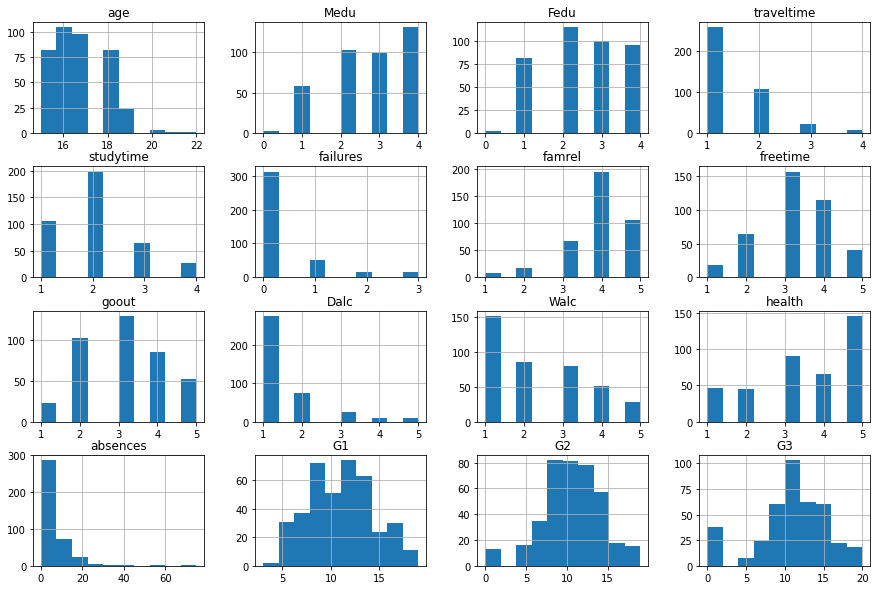

In [43]:
# Plotting all columns
math.hist(layout=(4,4), figsize=(15,10))

plt.show()

In [ ]:
# Right-sided distributions:traveltime, studytime,failures, Walc, Dalc, absences
# Normal distributions: freetime, goout, G's

In [21]:
mathNum=math.select_dtypes(include='number').copy()



In [22]:
mathNum

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [23]:
# Columns with scale 1-4
mathFirst = mathNum.iloc[:, 1:6]

In [24]:
mathFirst

,Medu,Fedu,traveltime,studytime,failures
0,4,4,2,2,0
1,1,1,1,2,0
2,1,1,1,2,3
3,4,2,1,3,0
4,3,3,1,2,0
...,...,...,...,...,...
390,2,2,1,2,2
391,3,1,2,1,0
392,1,1,1,1,3
393,3,2,3,1,0


In [34]:
# Checking correlation of columns in mathFirst and plotting

corr_matrix1 = mathFirst.corr('pearson')
corr_matrix1.style.background_gradient(cmap='coolwarm')

,Medu,Fedu,traveltime,studytime,failures
Medu,1.000000,0.623455,-0.171639,0.064944,-0.236680
Fedu,0.623455,1.000000,-0.158194,-0.009175,-0.250408
traveltime,-0.171639,-0.158194,1.000000,-0.100909,0.092239
studytime,0.064944,-0.009175,-0.100909,1.000000,-0.173563
failures,-0.236680,-0.250408,0.092239,-0.173563,1.000000


In [35]:
# We see that mother's and father's education are strongly correlated, so we can drop one column

In [36]:
# Columns with scale 1-5
mathSecond=mathNum.iloc[:, 6:12]

In [37]:
mathSecond

,famrel,freetime,goout,Dalc,Walc,health
0,4,3,4,1,1,3
1,5,3,3,1,1,3
2,4,3,2,2,3,3
3,3,2,2,1,1,5
4,4,3,2,1,2,5
...,...,...,...,...,...,...
390,5,5,4,4,5,4
391,2,4,5,3,4,2
392,5,5,3,3,3,3
393,4,4,1,3,4,5


In [38]:
corr_matrix2 = mathSecond.corr('pearson')
corr_matrix2.style.background_gradient(cmap='coolwarm')

,famrel,freetime,goout,Dalc,Walc,health
famrel,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056
freetime,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733
goout,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577
Dalc,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180
Walc,-0.113397,0.147822,0.420386,0.647544,1.000000,0.092476
health,0.094056,0.075733,-0.009577,0.077180,0.092476,1.000000


In [39]:
# Here we see that workday alcohol consumption and weekend alcohol consumption are correlated, so we can drop one.

In [40]:
# Last three columns
mathLast3=mathNum.iloc[:,13:16]

In [45]:
mathLast3.describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


In [46]:
corr_matrix3 = mathLast3.corr('pearson')
corr_matrix3.style.background_gradient(cmap='coolwarm')

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


In [ ]:
# I don't understand colors here but maybe we could drop G1.

In [47]:
# Just for fun, correlation of absences and G3, need to rescale them to common scale.
absG3=mathNum[["absences", "G3"]]
corr_matrix4 = absG3.corr('pearson')
corr_matrix4.style.background_gradient(cmap='coolwarm')

,absences,G3
absences,1.000000,0.034247
G3,0.034247,1.000000


In [ ]:
# PREPROCESSING: 
# 1. REMOVING OUTLIERS
# 2.UNIFORM SCALE AND HOW TO COMPARE IT TO NORMALLY DISTRIBUTED COLUMNS

In [ ]:
#1. Forming a new dataframe w/o outliers